In [78]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('ggplot')

In [79]:
data = pd.read_csv('Prostate_Cancer.csv')
data

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [80]:
data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [81]:
data.keys()

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [82]:
data.shape

(100, 10)

In [83]:
data["diagnosis_result"].shape

(100,)

In [84]:
data.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [85]:
data["diagnosis_result"].value_counts()

diagnosis_result
M    62
B    38
Name: count, dtype: int64

In [86]:
y = data["diagnosis_result"].values
y

array(['M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M'], dtype=object)

In [87]:
X = data.drop(["diagnosis_result"], axis=1)
X = X.values
X

array([[1.000e+00, 2.300e+01, 1.200e+01, 1.510e+02, 9.540e+02, 1.430e-01,
        2.780e-01, 2.420e-01, 7.900e-02],
       [2.000e+00, 9.000e+00, 1.300e+01, 1.330e+02, 1.326e+03, 1.430e-01,
        7.900e-02, 1.810e-01, 5.700e-02],
       [3.000e+00, 2.100e+01, 2.700e+01, 1.300e+02, 1.203e+03, 1.250e-01,
        1.600e-01, 2.070e-01, 6.000e-02],
       [4.000e+00, 1.400e+01, 1.600e+01, 7.800e+01, 3.860e+02, 7.000e-02,
        2.840e-01, 2.600e-01, 9.700e-02],
       [5.000e+00, 9.000e+00, 1.900e+01, 1.350e+02, 1.297e+03, 1.410e-01,
        1.330e-01, 1.810e-01, 5.900e-02],
       [6.000e+00, 2.500e+01, 2.500e+01, 8.300e+01, 4.770e+02, 1.280e-01,
        1.700e-01, 2.090e-01, 7.600e-02],
       [7.000e+00, 1.600e+01, 2.600e+01, 1.200e+02, 1.040e+03, 9.500e-02,
        1.090e-01, 1.790e-01, 5.700e-02],
       [8.000e+00, 1.500e+01, 1.800e+01, 9.000e+01, 5.780e+02, 1.190e-01,
        1.650e-01, 2.200e-01, 7.500e-02],
       [9.000e+00, 1.900e+01, 2.400e+01, 8.800e+01, 5.200e+02, 1.270e-01

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 9)
(30, 9)
(70,)
(30,)


In [90]:
# criando modelos
qtd_modelos = 15
modelo_KNN = []
for idx in range(qtd_modelos):
    modelo_KNN.append(KNeighborsClassifier(n_neighbors=(idx+1)))

In [91]:
# treinando modelos
for idx in range(qtd_modelos):
    modelo_KNN[idx].fit(X_train, y_train)

In [92]:
# avaliando modelos
train_scores = []
test_scores = []
for idx in range(qtd_modelos):
    train_scores.append(modelo_KNN[idx].score(X_train, y_train))
    test_scores.append(modelo_KNN[idx].score(X_test, y_test))
print(train_scores)
print(test_scores)

[1.0, 0.8857142857142857, 0.8714285714285714, 0.8, 0.8285714285714286, 0.8428571428571429, 0.8428571428571429, 0.7857142857142857, 0.8142857142857143, 0.8142857142857143, 0.8285714285714286, 0.8142857142857143, 0.8, 0.8285714285714286, 0.8]
[0.8333333333333334, 0.8333333333333334, 0.8666666666666667, 0.8333333333333334, 0.8666666666666667, 0.9333333333333333, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]


In [93]:
best_k_neighbors = test_scores.index(np.max(test_scores)) + 1
best_k_neighbors

6

In [94]:
np_train_scores = np.array(train_scores)
np_test_scores = np.array(test_scores)
neighbors = np.arange(1, qtd_modelos+1)

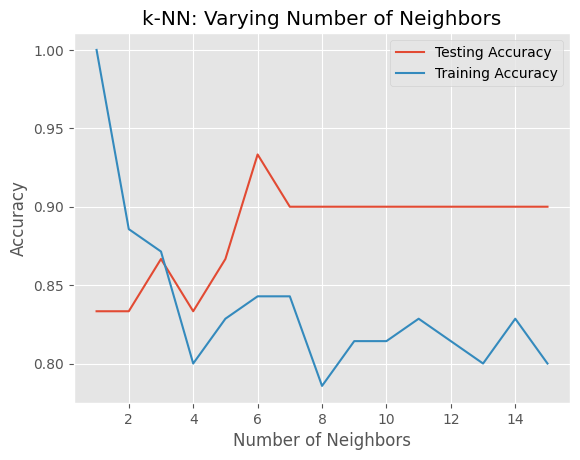

In [95]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, np_test_scores, label = 'Testing Accuracy')
plt.plot(neighbors, np_train_scores, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()